In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline



In [2]:
pd.set_option("mode.chained_assignment", None) # <=== 경고를 끈다

In [4]:
filename= '../data/train.csv'

In [5]:
data_train = pd.read_csv(filename)

In [6]:
filename = '../data/test.csv'

In [7]:
data_test = pd.read_csv(filename)

In [12]:
filename = '../data/meta/y_feature_spec_info.csv'

In [13]:
data_threshold = pd.read_csv(filename)

In [14]:
# y feature data의 threashold에 따른 정상 / 비정상 label 부여
def get_label(data_df):
  label = []
  for i in range(data_df.shape[0]):
    is_anomaly = False
    for idx in range(len(data_threshold)):
      if data_df[data_threshold["Feature"].iloc[idx]].iloc[i] < data_threshold["최소"].iloc[idx]:
        is_anomaly = True
        break
      elif data_df[data_threshold["Feature"].iloc[idx]].iloc[i] > data_threshold["최대"].iloc[idx]:
        is_anomaly = True
        break
    if is_anomaly:
      label.append(1)
    else:
      label.append(0)
  return label

In [16]:
# 최소 최대 값으로 이상치 부여
data_threshold

,Feature,최소,최대
0,Y_01,0.2,2.0
1,Y_02,0.2,2.1
2,Y_03,0.2,2.1
3,Y_04,7.0,19.0
4,Y_05,22.0,36.5
5,Y_06,-19.2,19.0
6,Y_07,2.4,4.0
7,Y_08,-29.2,-24.0
8,Y_09,-29.2,-24.0
9,Y_10,-30.6,-20.0


In [17]:
data_threshold.head()

,Feature,최소,최대
0,Y_01,0.2,2.0
1,Y_02,0.2,2.1
2,Y_03,0.2,2.1
3,Y_04,7.0,19.0
4,Y_05,22.0,36.5


In [18]:
data_train

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,...,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,...,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,...,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,...,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,...,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,TRAIN_39603,66.465,103.320,62.27,1,103.150,66.825,30.20,77.83,298.05,...,29.194,16.582,3.410,-26.486,-26.581,-22.772,24.261,-26.491,-26.584,-26.580
39603,TRAIN_39604,66.465,103.321,62.77,1,102.021,66.825,29.21,102.25,270.67,...,29.859,15.659,3.406,-27.308,-27.203,-24.674,23.427,-27.250,-27.334,-27.325
39604,TRAIN_39605,68.504,103.320,64.67,1,103.144,68.864,29.96,102.61,198.07,...,24.720,16.823,3.215,-26.502,-26.687,-22.577,24.301,-26.388,-26.425,-26.601
39605,TRAIN_39606,66.465,103.320,63.67,1,102.025,67.845,30.30,112.60,275.52,...,26.412,15.757,4.216,-26.760,-26.634,-24.066,23.305,-26.536,-26.751,-26.635


In [19]:
data_train["label"] = get_label(data_train)

In [20]:
data_train.head()

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14,label
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,...,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304,1
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,...,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438,0
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,...,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370,0
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,...,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345,0
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,...,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974,0


In [21]:
data_test.head()

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,TEST_00001,68.504,103.321,76.67,1,101.867,73.963,30.51,63.57,239.80,...,1,1,17227.63,138.130429,129.460682,141.506570,133.427229,129.711498,133.138096,121.859684
1,TEST_00002,67.485,103.320,69.37,1,101.992,67.845,28.03,116.99,189.23,...,1,1,17134.53,136.148839,128.266277,145.911745,131.196417,132.411480,133.629025,124.178623
2,TEST_00003,69.524,103.320,68.97,1,101.884,77.022,29.65,205.68,214.93,...,1,1,14860.83,120.447446,119.988804,132.099908,120.450155,130.051708,128.252972,114.475628
3,TEST_00004,69.524,103.320,65.87,1,101.866,73.963,28.15,103.38,180.80,...,1,1,15252.53,133.994695,125.069180,147.507669,123.142653,125.963665,139.666592,126.589253
4,TEST_00005,73.603,103.321,66.67,1,101.891,74.983,29.92,71.20,231.93,...,1,1,10752.23,137.918202,135.116192,138.600473,127.173033,137.252712,134.411335,124.020016


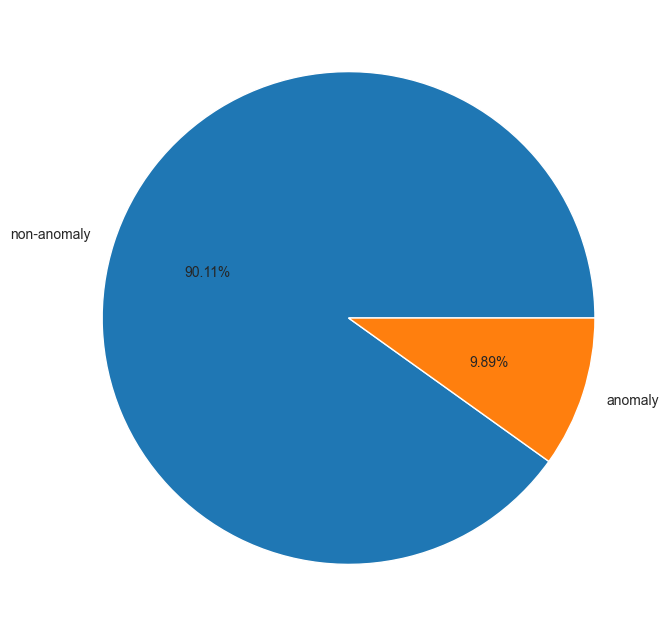

In [23]:
result = [0,0]

for i in range(data_train.shape[0]):

  if data_train["label"].iloc[i] ==0:
    result[0] += 1
  else:
    result[1] +=1



labels = ["non-anomaly", "anomaly"]

result = np.array(result)


fig = plt.figure(figsize=(8,8))
fig.set_facecolor("white")


ax = fig.add_subplot()

ax.pie(x = result, labels=labels, autopct= lambda p : '{:.2f}%'.format(p))
plt.show()

In [24]:
X_drop_list = ['ID', "label"]
for i in range(1, 15):
  i = str(i)
  if len(i) == 1:
    i = '0'+i
  X_drop_list.append("Y_"+i)

In [25]:
X_drop_list

['ID',
 'label',
 'Y_01',
 'Y_02',
 'Y_03',
 'Y_04',
 'Y_05',
 'Y_06',
 'Y_07',
 'Y_08',
 'Y_09',
 'Y_10',
 'Y_11',
 'Y_12',
 'Y_13',
 'Y_14']

In [26]:

Y_drop_list = ['ID']
for i in range(1, 57):
  i = str(i)
  if len(i) == 1:
    i = '0'+i
  Y_drop_list.append("X_"+i)


In [27]:
Y_drop_list

['ID',
 'X_01',
 'X_02',
 'X_03',
 'X_04',
 'X_05',
 'X_06',
 'X_07',
 'X_08',
 'X_09',
 'X_10',
 'X_11',
 'X_12',
 'X_13',
 'X_14',
 'X_15',
 'X_16',
 'X_17',
 'X_18',
 'X_19',
 'X_20',
 'X_21',
 'X_22',
 'X_23',
 'X_24',
 'X_25',
 'X_26',
 'X_27',
 'X_28',
 'X_29',
 'X_30',
 'X_31',
 'X_32',
 'X_33',
 'X_34',
 'X_35',
 'X_36',
 'X_37',
 'X_38',
 'X_39',
 'X_40',
 'X_41',
 'X_42',
 'X_43',
 'X_44',
 'X_45',
 'X_46',
 'X_47',
 'X_48',
 'X_49',
 'X_50',
 'X_51',
 'X_52',
 'X_53',
 'X_54',
 'X_55',
 'X_56']

In [28]:
data_train

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14,label
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,...,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304,1
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,...,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438,0
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,...,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370,0
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,...,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345,0
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,...,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,TRAIN_39603,66.465,103.320,62.27,1,103.150,66.825,30.20,77.83,298.05,...,16.582,3.410,-26.486,-26.581,-22.772,24.261,-26.491,-26.584,-26.580,0
39603,TRAIN_39604,66.465,103.321,62.77,1,102.021,66.825,29.21,102.25,270.67,...,15.659,3.406,-27.308,-27.203,-24.674,23.427,-27.250,-27.334,-27.325,0
39604,TRAIN_39605,68.504,103.320,64.67,1,103.144,68.864,29.96,102.61,198.07,...,16.823,3.215,-26.502,-26.687,-22.577,24.301,-26.388,-26.425,-26.601,0
39605,TRAIN_39606,66.465,103.320,63.67,1,102.025,67.845,30.30,112.60,275.52,...,15.757,4.216,-26.760,-26.634,-24.066,23.305,-26.536,-26.751,-26.635,1


In [29]:
data_train_X = data_train.drop(X_drop_list, axis = 1)
data_train_y = data_train.drop(Y_drop_list, axis = 1)
data_test = data_test.drop(["ID"], axis = 1)



In [30]:

# 추가 필요없는 x feature drop
drop_list = ["X_04", "X_23", "X_47", "X_48"]
data_train_X = data_train_X.drop(drop_list, axis = 1)
data_test = data_test.drop(drop_list, axis = 1)

In [32]:
data_train_X.columns

Index(['X_01', 'X_02', 'X_03', 'X_05', 'X_06', 'X_07', 'X_08', 'X_09', 'X_10',
       'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18', 'X_19',
       'X_20', 'X_21', 'X_22', 'X_24', 'X_25', 'X_26', 'X_27', 'X_28', 'X_29',
       'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36', 'X_37', 'X_38',
       'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45', 'X_46', 'X_49',
       'X_50', 'X_51', 'X_52', 'X_53', 'X_54', 'X_55', 'X_56'],
      dtype='object')

In [33]:
def get_values(data_df, start_val, end_val, get_std = False):
  diff = []
  std = []
  for i in range(data_df.shape[0]):
    vals = []
    for s in range(start_val, end_val + 1):
      vals.append(data_df["X_"+str(s)].iloc[i])
    diff.append(max(vals) - min(vals))
    if get_std:
      std.append(np.std(vals))
  return diff, std

In [34]:
def get_sum_values(data_df, val_list):
  sums = []
  for i in range(data_df.shape[0]):
    vals = []
    for s in val_list:
      vals.append(data_df["X_"+str(s)].iloc[i])
    sums.append(sum(vals))
  return sums

In [ ]:
### 무게 / 면적
data_train_X["X_03/X_07"] = data_train_X["X_03"] / data_train_X["X_07"]
data_test["X_03/X_07"] = data_test["X_03"] / data_test["X_07"]

In [35]:
### 레이돔 치수 차이 ###
diff, std = get_values(data_train_X, 41, 44)

In [37]:
len(diff)

39607

In [39]:
data_train_X["X_41~44-diff"] = diff

In [40]:
data_train_X

,X_01,X_02,X_03,X_05,X_06,X_07,X_08,X_09,X_10,X_11,...,X_46,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_41~44-diff
0,70.544,103.320,67.47,101.892,74.983,29.45,62.38,245.71,0.0,0.0,...,1463,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256,0.29
1,69.524,103.321,65.17,101.944,72.943,28.73,61.23,233.61,0.0,0.0,...,1463,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308,0.13
2,72.583,103.320,64.07,103.153,72.943,28.81,105.77,272.20,0.0,0.0,...,1468,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232,0.14
3,71.563,103.320,67.57,101.971,77.022,28.92,115.21,255.36,0.0,0.0,...,1469,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225,0.22
4,69.524,103.320,63.57,101.981,70.904,29.68,103.38,241.46,0.0,0.0,...,1469,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,66.465,103.320,62.27,103.150,66.825,30.20,77.83,298.05,0.0,0.0,...,1469,60630.73,129.965741,130.807148,133.481737,125.273130,121.780933,133.780110,129.029812,0.11
39603,66.465,103.321,62.77,102.021,66.825,29.21,102.25,270.67,0.0,0.0,...,1458,60763.43,127.633885,120.158764,142.667802,122.465490,122.987209,143.090741,122.811413,0.12
39604,68.504,103.320,64.67,103.144,68.864,29.96,102.61,198.07,0.0,0.0,...,1459,8813.33,132.501286,136.893025,134.419328,129.115431,130.920147,140.489232,119.166699,0.13
39605,66.465,103.320,63.67,102.025,67.845,30.30,112.60,275.52,0.0,0.0,...,1469,62222.33,128.189679,121.495930,141.288011,130.141676,125.518825,136.603634,124.525929,0.11


In [41]:
diff, std = get_values(data_test, 41, 44)
data_test["X_41~44-diff"] = diff

In [42]:
### 1~4 단계별 누름량 합산 ###
sums = get_sum_values(data_train_X, ["01", "02", "05", "06"])
data_train_X["X_1~6_push-sum"] = sums
sums = get_sum_values(data_test, ["01", "02", "05", "06"])
data_test["X_1~6_push-sum"] = sums

In [ ]:
# 그냥 이정도의 feature 만 생성하고 모델 여러개 만들어서 ensemble 해서 결과제출


In [44]:
### 방열 재료 면적 합산 ###
sums = get_sum_values(data_train_X, ["07", "08", "09"])
data_train_X["X_7~9_area-sum"] = sums
sums = get_sum_values(data_test, ["07", "08", "09"])
data_test["X_7~9_area-sum"] = sums

### 스크류 삽입 깊이가 재질과 관련?
data_train_X["X_03/X_19~22"] = data_train_X["X_03"]/(data_train_X["X_19"]+data_train_X["X_20"]+data_train_X["X_21"]+data_train_X["X_22"])
data_test["X_03/X_19~22"] = data_test["X_03"]/(data_test["X_19"]+data_test["X_20"]+data_test["X_21"]+data_test["X_22"])

# 커넥터 위치 좌표와 커넥터핀 치수 관계
data_train_X["X_12/X_24~25"] = data_train_X["X_12"] / ((data_train_X["X_24"]+data_train_X["X_25"])/2)
data_test["X_12/X_24~25"] = data_test["X_12"] / ((data_test["X_24"]+data_test["X_25"])/2)

#importance 높은 데이터 조합
data_train_X["49_7_19_3_8"] = data_train_X["X_49"] / data_train_X["X_49"].mean()+data_train_X["X_07"] / data_train_X["X_07"].mean()+data_train_X["X_19"] / data_train_X["X_19"].mean()+data_train_X["X_03"] / data_train_X["X_03"].mean()
data_test["49_7_19_3_8"] = data_test["X_49"] / data_train_X["X_49"].mean()+data_test["X_07"] / data_train_X["X_07"].mean()+data_test["X_19"] / data_train_X["X_19"].mean()+data_test["X_03"] / data_train_X["X_03"].mean()

In [45]:
data_train_y.head()

,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14,label
0,2.056,1.456,1.680,10.502,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304,1
1,1.446,1.184,1.268,18.507,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438,0
2,1.251,0.665,0.782,14.082,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370,0
3,1.464,1.079,1.052,16.975,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345,0
4,0.983,0.646,0.689,15.047,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974,0


In [47]:
from sklearn.metrics import mean_squared_error
import tensorflow as tf
tf.random.set_seed(42)


# 평가산식
def lg_nrmse(gt, preds):
    # 각 Y Feature별 NRMSE 총합
    # Y_01 ~ Y_08 까지 20% 가중치 부여
    all_nrmse = []
    for idx in range(14): # ignore 'ID'
        rmse = mean_squared_error(gt[:,idx], preds[:,idx], squared=False)
        nrmse = rmse/np.mean(np.abs(gt[:,idx]))
        all_nrmse.append(nrmse)
    score = 1.2 * np.sum(all_nrmse[:7]) + 1.0 * np.sum(all_nrmse[7:14])
    return score

c:\users\data\appdata\local\programs\python\python38\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.11) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [46]:
!pip install catboost

In [48]:
#lightgbm-3.3.2
!pip install lightgbm==2.2.3

     ------------------------------------- 515.9/515.9 kB 31.6 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 3.3.2
    Uninstalling lightgbm-3.3.2:
      Successfully uninstalled lightgbm-3.3.2


In [53]:
#origin xgboost 1.3.2
!pip install xgboost==0.9.0

ERROR: Could not install packages due to an OSError: HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Max retries exceeded with url: /packages/62/ff/e0c9ffb5c46ee6166bb03b4f4eacc515d34a3aab38dec4d731a54328fc85/xgboost-1.3.2-py3-none-win_amd64.whl (Caused by ReadTimeoutError("HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Read timed out. (read timeout=15)"))



     --------------------------------------- 86.5/86.5 MB 31.2 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
# https://koreapy.tistory.com/941
# multioutputregressor 에 특정 알고리즘을 넣고 그리드서치하는법까지
from sklearn.utils.validation import _check_fit_params
from sklearn.base import is_classifier
from sklearn.utils.fixes import delayed
from joblib import Parallel
from sklearn.multioutput import _fit_estimator
from sklearn.multioutput import MultiOutputRegressor
import lightgbm

class MyMultiOutputRegressor_LGBM(MultiOutputRegressor):

    def fit(self, X, y, sample_weight=None, **fit_params):
        """ Fit the model to data.
        Fit a separate model for each output variable.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            Data.
        y : {array-like, sparse matrix} of shape (n_samples, n_outputs)
            Multi-output targets. An indicator matrix turns on multilabel
            estimation.
        sample_weight : array-like of shape (n_samples,), default=None
            Sample weights. If None, then samples are equally weighted.
            Only supported if the underlying regressor supports sample
            weights.
        **fit_params : dict of string -> object
            Parameters passed to the ``estimator.fit`` method of each step.
            .. versionadded:: 0.23
        Returns
        -------
        self : object
        """

        if not hasattr(self.estimator, "fit"):
            raise ValueError("The base estimator should implement"
                             " a fit method")

        X, y = self._validate_data(X, y,
                                   force_all_finite=False,
                                   multi_output=True, accept_sparse=True)

        if is_classifier(self):
            check_classification_targets(y)

        if y.ndim == 1:
            raise ValueError("y must have at least two dimensions for "
                             "multi-output regression but has only one.")

        if (sample_weight is not None and
                not has_fit_parameter(self.estimator, 'sample_weight')):
            raise ValueError("Underlying estimator does not support"
                             " sample weights.")

        lambda_y = lambda i: '0'+str(i+1) if i<9 else str(i+1)

        fit_params_validated = _check_fit_params(X, fit_params)
        [(X_test, Y_test)] = fit_params_validated.pop('eval_set')
        self.estimators_ = Parallel(n_jobs=self.n_jobs)(
            delayed(_fit_estimator)(
                self.estimator, X, y[:, i], sample_weight,
                **fit_params_validated,
                eval_set=[(X_test, Y_test[:, i])],
                eval_names="Y_" + lambda_y(i),
                verbose=-1,
                callbacks=[lightgbm.early_stopping(200)])
            for i in range(y.shape[1]))
        return self

    # model save
    def save(self, path):
        for chain_idx, estimator in enumerate(self.estimators_):
            save_path = '{}_{}.txt'.format(path, chain_idx)
            estimator.booster_.save_model(save_path)

    # model load
    def load(self, path):
        for chain_idx, estimator in enumerate(self.estimators_):
            save_path = '{}_{}.txt'.format(path, chain_idx)
            self.estimators_[chain_idx] = lightgbm.Booster(save_path)

In [ ]:
from sklearn.utils.validation import _check_fit_params
from sklearn.base import is_classifier
from sklearn.utils.fixes import delayed
from joblib import Parallel
from sklearn.multioutput import _fit_estimator
from sklearn.multioutput import MultiOutputRegressor
import xgboost
import pickle

class MyMultiOutputRegressor_XGB(MultiOutputRegressor):

    def fit(self, X, y, sample_weight=None, **fit_params):
        """ Fit the model to data.
        Fit a separate model for each output variable.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            Data.
        y : {array-like, sparse matrix} of shape (n_samples, n_outputs)
            Multi-output targets. An indicator matrix turns on multilabel
            estimation.
        sample_weight : array-like of shape (n_samples,), default=None
            Sample weights. If None, then samples are equally weighted.
            Only supported if the underlying regressor supports sample
            weights.
        **fit_params : dict of string -> object
            Parameters passed to the ``estimator.fit`` method of each step.
            .. versionadded:: 0.23
        Returns
        -------
        self : object
        """

        if not hasattr(self.estimator, "fit"):
            raise ValueError("The base estimator should implement"
                             " a fit method")

        X, y = self._validate_data(X, y,
                                   force_all_finite=False,
                                   multi_output=True, accept_sparse=True)

        if is_classifier(self):
            check_classification_targets(y)

        if y.ndim == 1:
            raise ValueError("y must have at least two dimensions for "
                             "multi-output regression but has only one.")

        if (sample_weight is not None and
                not has_fit_parameter(self.estimator, 'sample_weight')):
            raise ValueError("Underlying estimator does not support"
                             " sample weights.")

        fit_params_validated = _check_fit_params(X, fit_params)
        [(X_test, Y_test)] = fit_params_validated.pop('eval_set')
        self.estimators_ = Parallel(n_jobs=self.n_jobs)(
            delayed(_fit_estimator)(
                self.estimator, X, y[:, i],
                eval_set=[(X_test, Y_test[:, i])],
                early_stopping_rounds=100,
                #eval_metric = ["rmse"],
                verbose=3000)

            for i in range(y.shape[1]))
        return self

    # model save
    def save(self, path):
        for chain_idx, estimator in enumerate(self.estimators_):
            save_path = '{}_{}.dat'.format(path, chain_idx)
            pickle.dump(estimator, open(save_path, "wb"))

    # model load
    def load(self, path):
        for chain_idx, estimator in enumerate(self.estimators_):
            save_path = '{}_{}.dat'.format(path, chain_idx)
            model = pickle.load(open(save_path, "rb"))